In [1]:
# # 한글깨짐 현상 -> 파일 열자마자 설치하고 주석처리 한 다음에 런타임 다시 돌리기 !
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [2]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumBarunGothic')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/MyDrive/세종시/data/10.세종시_오피스텔(전월세)_실거래가.csv')
df.head()

,시군구,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,보증금(만원),월세(만원),층,건축년도
0,세종특별자치시 어진동,0,0,2차푸르지오시티,전세,21.92,201701,1,"7,500",0,9,2014
1,세종특별자치시 어진동,0,0,푸르지오시티,월세,23.74,201701,2,300,30,13,2014
2,세종특별자치시 어진동,0,0,호수의아침,전세,23.57,201701,3,"6,000",0,11,2014
3,세종특별자치시 어진동,0,0,호수의아침,전세,23.57,201701,5,"7,000",0,10,2014
4,세종특별자치시 어진동,0,0,2차푸르지오시티,전세,21.92,201701,6,"7,000",0,15,2014


In [5]:
df['동네'] = df.시군구.str.split(' ').str[1]
df.head()

,시군구,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,보증금(만원),월세(만원),층,건축년도,동네
0,세종특별자치시 어진동,0,0,2차푸르지오시티,전세,21.92,201701,1,"7,500",0,9,2014,어진동
1,세종특별자치시 어진동,0,0,푸르지오시티,월세,23.74,201701,2,300,30,13,2014,어진동
2,세종특별자치시 어진동,0,0,호수의아침,전세,23.57,201701,3,"6,000",0,11,2014,어진동
3,세종특별자치시 어진동,0,0,호수의아침,전세,23.57,201701,5,"7,000",0,10,2014,어진동
4,세종특별자치시 어진동,0,0,2차푸르지오시티,전세,21.92,201701,6,"7,000",0,15,2014,어진동


In [6]:
# 불필요한 컬럼 삭제

df = df.drop(['계약년월', '계약일','시군구','본번','부번','단지명'],axis=1)
df

,전월세구분,전용면적(㎡),보증금(만원),월세(만원),층,건축년도,동네
0,전세,21.92,"7,500",0,9,2014,어진동
1,월세,23.74,300,30,13,2014,어진동
2,전세,23.57,"6,000",0,11,2014,어진동
3,전세,23.57,"7,000",0,10,2014,어진동
4,전세,21.92,"7,000",0,15,2014,어진동
...,...,...,...,...,...,...,...
1269,전세,26.18,"14,000",0,6,2020,나성동
1270,월세,32.50,"1,000",65,4,2020,나성동
1271,전세,24.03,"9,000",0,4,2014,도담동
1272,전세,26.18,"16,000",0,8,2020,나성동


In [7]:
# object형인 거래금액 int 형으로 바꾸기 

df['보증금(만원)'] = df['보증금(만원)'].str.replace(',', '').astype('int64')
df.head()

,전월세구분,전용면적(㎡),보증금(만원),월세(만원),층,건축년도,동네
0,전세,21.92,7500,0,9,2014,어진동
1,월세,23.74,300,30,13,2014,어진동
2,전세,23.57,6000,0,11,2014,어진동
3,전세,23.57,7000,0,10,2014,어진동
4,전세,21.92,7000,0,15,2014,어진동


In [8]:
df['동네'].unique()

array(['어진동', '도담동', '나성동', '조치원읍', '부강면'], dtype=object)

# 전월세전환률을 적용하여 최종 전세금 구하기

In [9]:
df11 = df[df['전월세구분']=='전세']
df11.head()

,전월세구분,전용면적(㎡),보증금(만원),월세(만원),층,건축년도,동네
0,전세,21.92,7500,0,9,2014,어진동
2,전세,23.57,6000,0,11,2014,어진동
3,전세,23.57,7000,0,10,2014,어진동
4,전세,21.92,7000,0,15,2014,어진동
7,전세,23.74,7500,0,13,2014,어진동


In [10]:
df22 = df[df['전월세구분']=='월세']
df22.head()

,전월세구분,전용면적(㎡),보증금(만원),월세(만원),층,건축년도,동네
1,월세,23.74,300,30,13,2014,어진동
5,월세,27.43,500,37,7,2014,도담동
6,월세,23.24,2000,27,13,2014,어진동
10,월세,28.65,500,40,15,2014,어진동
11,월세,24.03,300,35,5,2014,도담동


In [11]:
#월세집에 있는 보증금을 0으로 만들어주는 작업

df22['보증금(만원)'] = df22['보증금(만원)'] *0
df22.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,전월세구분,전용면적(㎡),보증금(만원),월세(만원),층,건축년도,동네
1,월세,23.74,0,30,13,2014,어진동
5,월세,27.43,0,37,7,2014,도담동
6,월세,23.24,0,27,13,2014,어진동
10,월세,28.65,0,40,15,2014,어진동
11,월세,24.03,0,35,5,2014,도담동


In [12]:
df= pd.concat([df22,df11])
df

,전월세구분,전용면적(㎡),보증금(만원),월세(만원),층,건축년도,동네
1,월세,23.74,0,30,13,2014,어진동
5,월세,27.43,0,37,7,2014,도담동
6,월세,23.24,0,27,13,2014,어진동
10,월세,28.65,0,40,15,2014,어진동
11,월세,24.03,0,35,5,2014,도담동
...,...,...,...,...,...,...,...
1267,전세,26.18,14000,0,4,2020,나성동
1269,전세,26.18,14000,0,6,2020,나성동
1271,전세,24.03,9000,0,4,2014,도담동
1272,전세,26.18,16000,0,8,2020,나성동


In [13]:
# 전월세 상관없이 전세금으로 바꾸어주는 작업

df['전세보증금(전세변환)'] = df['월세(만원)'] *12*100/2.5  # 전세금 구하는 공식
df

,전월세구분,전용면적(㎡),보증금(만원),월세(만원),층,건축년도,동네,전세보증금(전세변환)
1,월세,23.74,0,30,13,2014,어진동,14400.0
5,월세,27.43,0,37,7,2014,도담동,17760.0
6,월세,23.24,0,27,13,2014,어진동,12960.0
10,월세,28.65,0,40,15,2014,어진동,19200.0
11,월세,24.03,0,35,5,2014,도담동,16800.0
...,...,...,...,...,...,...,...,...
1267,전세,26.18,14000,0,4,2020,나성동,0.0
1269,전세,26.18,14000,0,6,2020,나성동,0.0
1271,전세,24.03,9000,0,4,2014,도담동,0.0
1272,전세,26.18,16000,0,8,2020,나성동,0.0


In [14]:
print(df['전세보증금(전세변환)'].max())
print(df['보증금(만원)'].max())

36000.0
16000


In [15]:
df['최종보증금(만원)'] = df['보증금(만원)']+df['전세보증금(전세변환)']
df

,전월세구분,전용면적(㎡),보증금(만원),월세(만원),층,건축년도,동네,전세보증금(전세변환),최종보증금(만원)
1,월세,23.74,0,30,13,2014,어진동,14400.0,14400.0
5,월세,27.43,0,37,7,2014,도담동,17760.0,17760.0
6,월세,23.24,0,27,13,2014,어진동,12960.0,12960.0
10,월세,28.65,0,40,15,2014,어진동,19200.0,19200.0
11,월세,24.03,0,35,5,2014,도담동,16800.0,16800.0
...,...,...,...,...,...,...,...,...,...
1267,전세,26.18,14000,0,4,2020,나성동,0.0,14000.0
1269,전세,26.18,14000,0,6,2020,나성동,0.0,14000.0
1271,전세,24.03,9000,0,4,2014,도담동,0.0,9000.0
1272,전세,26.18,16000,0,8,2020,나성동,0.0,16000.0


# 불필요한 컬럼 삭제

In [16]:
# 원핫 인코딩 후 불필요한 컬럼 삭제
df.drop(['보증금(만원)','월세(만원)','전세보증금(전세변환)'], axis=1, inplace=True)
df.head()

,전월세구분,전용면적(㎡),층,건축년도,동네,최종보증금(만원)
1,월세,23.74,13,2014,어진동,14400.0
5,월세,27.43,7,2014,도담동,17760.0
6,월세,23.24,13,2014,어진동,12960.0
10,월세,28.65,15,2014,어진동,19200.0
11,월세,24.03,5,2014,도담동,16800.0


In [17]:
df_oh1 = pd.get_dummies(data=df, columns=['동네'])
df_oh1

,전월세구분,전용면적(㎡),층,건축년도,최종보증금(만원),동네_나성동,동네_도담동,동네_부강면,동네_어진동,동네_조치원읍
1,월세,23.74,13,2014,14400.0,0,0,0,1,0
5,월세,27.43,7,2014,17760.0,0,1,0,0,0
6,월세,23.24,13,2014,12960.0,0,0,0,1,0
10,월세,28.65,15,2014,19200.0,0,0,0,1,0
11,월세,24.03,5,2014,16800.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1267,전세,26.18,4,2020,14000.0,1,0,0,0,0
1269,전세,26.18,6,2020,14000.0,1,0,0,0,0
1271,전세,24.03,4,2014,9000.0,0,1,0,0,0
1272,전세,26.18,8,2020,16000.0,1,0,0,0,0


In [18]:
# 전월세 인코딩
df_oh2 = pd.get_dummies(df['전월세구분'])
df_oh2.head()

,월세,전세
1,1,0
5,1,0
6,1,0
10,1,0
11,1,0


In [19]:
# 인코딩한 값들 합치기

df_oh = pd.concat([df_oh1,df_oh2],axis=1)
df_oh.head()

,전월세구분,전용면적(㎡),층,건축년도,최종보증금(만원),동네_나성동,동네_도담동,동네_부강면,동네_어진동,동네_조치원읍,월세,전세
1,월세,23.74,13,2014,14400.0,0,0,0,1,0,1,0
5,월세,27.43,7,2014,17760.0,0,1,0,0,0,1,0
6,월세,23.24,13,2014,12960.0,0,0,0,1,0,1,0
10,월세,28.65,15,2014,19200.0,0,0,0,1,0,1,0
11,월세,24.03,5,2014,16800.0,0,1,0,0,0,1,0


In [21]:
# 원핫 인코딩 후 불필요한 컬럼 삭제
df_oh.drop(['전월세구분'], axis=1, inplace=True)
df_oh.head()

,전용면적(㎡),층,건축년도,최종보증금(만원),동네_나성동,동네_도담동,동네_부강면,동네_어진동,동네_조치원읍,월세,전세
1,23.74,13,2014,14400.0,0,0,0,1,0,1,0
5,27.43,7,2014,17760.0,0,1,0,0,0,1,0
6,23.24,13,2014,12960.0,0,0,0,1,0,1,0
10,28.65,15,2014,19200.0,0,0,0,1,0,1,0
11,24.03,5,2014,16800.0,0,1,0,0,0,1,0


In [22]:
#컬럼 순서 바꾸기

df_oh.columns

Index(['전용면적(㎡)', '층', '건축년도', '최종보증금(만원)', '동네_나성동', '동네_도담동', '동네_부강면',
       '동네_어진동', '동네_조치원읍', '월세', '전세'],
      dtype='object')

In [25]:
df_oh = df_oh[['전용면적(㎡)', '층', '건축년도', '동네_나성동', '동네_도담동', '동네_부강면',
       '동네_어진동', '동네_조치원읍', '월세', '전세', '최종보증금(만원)']]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


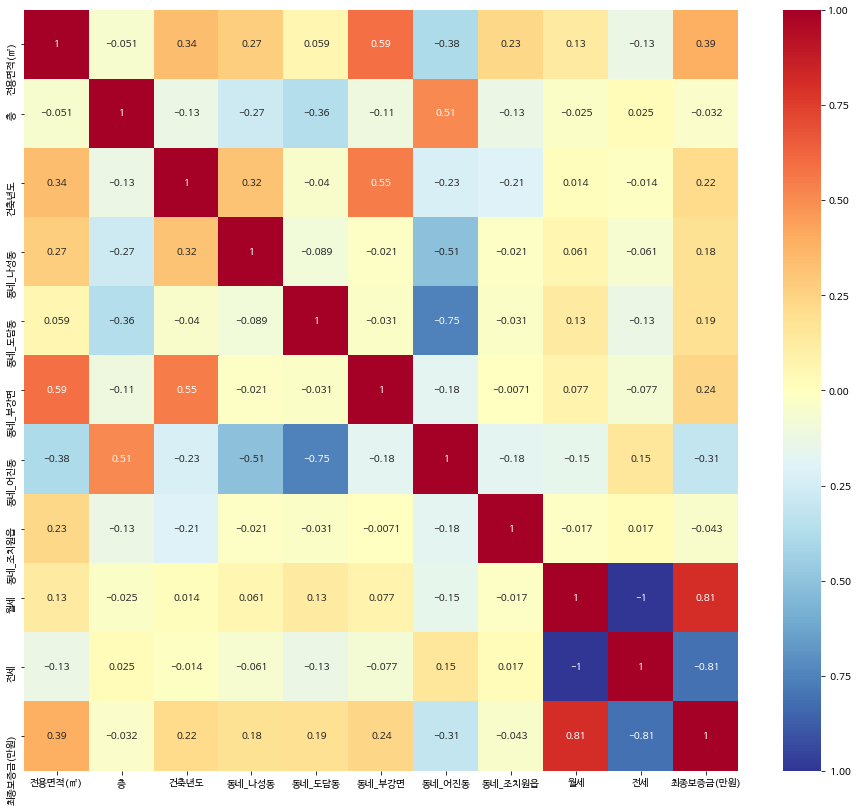

In [26]:
plt.figure(figsize=(16,14))
sns.heatmap(df_oh.corr(), annot=True, cmap = 'RdYlBu_r',vmin = -1, vmax = 1)
plt.show()

# 결론
- 몰라............................